<h1 id="i1"> Data 512 - A6 : Predicting Earthquakes : Final Project</h1>

Gautam Moogimane <br>
University of Washington - Fall 2018

<h2 id="i1">I. Introduction </h2>     
  
Having stayed in Japan for a long time, I've been accustomed to getting up at odd hours, with everything shaking around me. Tremors and earthquakes are so common, its rare for a week to go by without one. Considering the amount of damage these natural disasters are capable of, the fact that we are no closer to predicting them than we were a 100 years ago, is slightly surprising to say the least. With this analysis, I aim to use machine learning to analyze historic earthquake data from around the world, and use to it to hopefully come up with some observations about earthquakes in the future.

As per the statistics, there are hundreds of earthquakes that happen every day around the globe, with magnitudes ranging from 2-4 on the richter scale. The larger ones, between 5-7 on the scale occur every week or so, while the biggest at 7.5 and above are seen once a year. The 2011 Japan earthquake with its epicenter in Fukushima only had a magnitude of about 6.6, but was strong enough to cause buildings in Tokyo, which is a 100 miles away from Fukushima, to sway for around 30 seconds. Electricty went down, trains were stalled on the tracks, traffic came to a standstill, and thousands of people took to the streets, walking many miles to get back home. I was reading a paper on the economic damages caused by this earthquake, and it was in the range of around 360 billion. This is about 6% of Japans revenue for that year.

The aim of this study is not to break some new ground as far as predicting earthquakes go, but a way to see how appropriate or accurate machine learning can be in this situation. Statistics deals with probabilites, and machine learning, which applies these concepts on a computer, can only predict with a certain amount of accuracy, based on the data that it is trained on. To accurately predict earthquakes, one needs to be able to say with a degree of certainty, what the exact location, time of occurance and the magnitude will be. Considering the data we have, and how spread out the locations are, it would be an unrealistic goal trying to achieve this using machine learning at this point in time. Instead, with this analysis, given a certain location(like country with latitudes and longitudes), and time( year, instead of down to the exact second), if we can come up with information about the magnitude of the next earthquake/earthquakes, based on what happened in the past, that would be a good start. 

From a human centered ethics perspective, the system needs to ensure that any inherent bias in the data does not trickle down in the output generated. From a personal standpoint, I would need to ensure my experience in Japan, does not make me expect or not expect certain results from the model, thereby skewing the predictions in a particular direction.



<h2 id="i2">II. Background </h2>

There has been plenty of work done in this space, and some interesting work that I happened to come across are detailed below <br>
[Machine learning predicts earthquakes in a lab](https://www.cam.ac.uk/research/news/machine-learning-used-to-predict-earthquakes-in-a-lab-setting) <br>
This is a fascinating read of a team of researchers from University of Cambridge, Los Alamos National Laboratory and Boston University, who were able to identify signals that preempt the arrival of an earthquake under controlled settings. They had steel blocks set up to replicate the physical forces at work under the earths surface, and found particular acoustic signals being generated by the faults, just before an earthquake. Using a machine learning algorithm, that was fed this signal, it was able to identify instances when the fault was under stress, and about to cause an earthquake. <br>
An obvious drawback, is that the actual forces under the earths surface, are a lot different than what is found under controlled settings. So the sucess they have had in a lab, has not yet been replicated in actual settings. But the results are encouraging. <br>

Another paper that is an interesting read, is the research done in the Hindukush region, to predict the magnitude of an earthquake using machine learning. <br>
[Hindukush earthquake magnitude prediction](https://www.researchgate.net/publication/307951466_Earthquake_magnitude_prediction_in_Hindukush_region_using_machine_learning_techniques) <br>
They use mathematically calculated eight seismic indicators, and then apply four machine learning algorithms,
pattern recognition neural network, recurrent neural network, random forest and linear programming boost ensemble classifier to model relationships between the indicators and future earthquake occurences.

<h2 id="i3">III. Data</h2> 

The data is from the significant earthquake database, and contains historic data from 2150 BC to the present day, of earthquakes from all over the world. The data is constantly updated to reflect the latest events.


As per the description from the 'data.nodc.noaa.gov' site where the data is hosted:
 > The Significant Earthquake Database is a global listing of over 5,700 earthquakes from 2150 BC to the present. A significant earthquake is classified as one that meets at least one of the following criteria:
 
 > caused deaths, caused moderate damage (approximately 1 million dollars or more), magnitude 7.5 or greater, Modified Mercalli Intensity (MMI) X or greater, or the earthquake generated a tsunami. 
 
 > The database provides information on the date and time of occurrence, latitude and longitude, focal depth, magnitude, maximum MMI intensity, and socio-economic data such as the total number of casualties, injuries, houses destroyed, and houses damaged, and dollar damage estimates. 
References, political geography, and additional comments are also provided for each earthquake. If the earthquake was associated with a tsunami or volcanic eruption, it is flagged and linked to the related tsunami event or significant volcanic eruption.
 

The fields that are key from the perspective of our analysis are detailed in the table below <br>

| Field Name    | Datatype      | Description |
| :-------------: | :-------------: | :-------------: |
|  Year | Integer | The year of occurence  |
| Focal Depth  | Integer  | Depth of the epicenter |
| Eq_Primary | Float | Magnitude of the earthquake |
| Country | String | Name of the country |
| Location_Name | String | Specific location in the country | 
| Latitude | Float | Coordinates of the exact location |
| Longitude | Float | Coordinates of the exact location |



The data can be downloaded in a tab separated file, and can be imported into excel or python for analysis. <br>
We start by ingesting the data from the link provided below <br>
[National Geophysical Data Center / World Data Service (NGDC/WDS): Significant Earthquake Database. National Geophysical Data Center, NOAA](http://dx.doi.org/10.7289/V5TD9V7K)

### Step-1 Ingesting the data

In [6]:
import pandas as pd
import numpy as np
# the data is contained in a tab seperated file
raw_data = pd.read_csv('earthquake_historical.tsv', sep='\t')

In [7]:
# Describe the data
raw_data.describe()

,I_D,YEAR,MONTH,DAY,HOUR,MINUTE,FOCAL_DEPTH,EQ_PRIMARY,EQ_MAG_MW,EQ_MAG_MS,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
count,6067.000000,6067.000000,5662.000000,5510.000000,4039.000000,3833.00000,3115.000000,4280.000000,1212.000000,2916.000000,...,24.000000,22.000000,1180.000000,1354.000000,418.000000,3143.000000,7.780000e+02,1705.000000,3.700000e+02,709.000000
mean,4653.714192,1802.129718,6.506711,15.730127,11.304283,28.85964,41.725201,6.472220,6.527805,6.574451,...,2016.958333,2.000000,2518.709322,1.972674,1978.743206,2.194082,1.892610e+04,2.709091,6.688065e+04,2.421721
std,2921.242903,378.029895,3.448853,8.751046,7.033406,17.15401,71.307850,1.043618,0.936106,0.989850,...,8841.694676,1.154701,28320.900017,1.082683,12988.187606,1.041105,1.998497e+05,1.048056,1.091931e+06,1.124273
min,1.000000,-2150.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.600000,3.600000,2.100000,...,1.000000,1.000000,1.000000,1.000000,0.010000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000
25%,2140.500000,1817.500000,4.000000,8.000000,5.000000,14.00000,11.000000,5.700000,5.800000,5.800000,...,5.750000,1.000000,10.000000,1.000000,4.310000,1.000000,6.625000e+01,2.000000,8.375000e+01,1.000000
50%,4606.000000,1927.000000,7.000000,16.000000,11.000000,30.00000,26.000000,6.500000,6.500000,6.600000,...,25.500000,1.500000,42.500000,2.000000,28.000000,2.000000,5.370000e+02,3.000000,6.145000e+02,2.000000
75%,6471.500000,1986.000000,9.000000,23.000000,17.000000,44.00000,40.000000,7.300000,7.200000,7.300000,...,153.500000,3.000000,200.000000,3.000000,300.000000,3.000000,3.964500e+03,4.000000,2.790000e+03,3.000000
max,10373.000000,2018.000000,12.000000,31.000000,23.000000,59.00000,675.000000,9.500000,9.500000,9.100000,...,43476.000000,4.000000,799000.000000,4.000000,220085.456000,4.000000,5.360000e+06,4.000000,2.100000e+07,4.000000


### Step-2 Preparing the data

First thing to check is what the EQ fields other than EQ_PRIMARY contain, and if at any point they contain different values. <br>
We intend to use EQ_PRIMARY, but need to make sure the other fields do not contain additional information.<br>
Also dropping rows where EQ_PRIMARY or EQ_MAG_MS is null

In [8]:
# drop empty rows
comp = raw_data.dropna(subset=['EQ_PRIMARY', 'EQ_MAG_MS'])
comp = comp[['I_D','EQ_PRIMARY','EQ_MAG_MS']]
# compare the values of EQ_PRIMARY and EQ_MAG_MS
comp['Result'] = np.where(comp['EQ_PRIMARY'] == comp['EQ_MAG_MS'], 'TRUE', 'FALSE')
# find the ratio of rows that match to total rows 
(len(comp[comp.Result == 'TRUE']))/(len(comp))

0.7592592592592593

About 25% of the values seem to be different for the 2 columns. I suspect the different EQ columns 
are just recording values from different sources.

Another point to check is if there are rows where EQ_PRIMARY is null and data exists in other 6 EQ rows. 

In [9]:
# filter the data to rows where EQ_PRIMARY is null
temp = raw_data[pd.isnull(raw_data['EQ_PRIMARY'])]
# check for cases where the other rows are not null
temp[(temp.EQ_MAG_MS.notnull()) | (temp.EQ_MAG_MW.notnull()) | (temp.EQ_MAG_MB.notnull()) | (temp.EQ_MAG_ML.notnull()) | (temp.EQ_MAG_MFA.notnull()) | (temp.EQ_MAG_UNK.notnull())]  

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION


Turns out there are no such cases.<br>
We will continue to stick with EQ_PRIMARY for our analysis

The fields we are mainly concerned with are 'YEAR','MONTH','DAY','EQ_PRIMARY','COUNTRY','LATITUDE' and 'LONGITUDE'.
Creating a new dataframe with these fields


In [30]:
eq_df = raw_data[['YEAR','MONTH','DAY','EQ_PRIMARY','COUNTRY','LATITUDE','LONGITUDE']]
# renaming EQ_PRIMARY to MAGNITUDE
eq_df = eq_df.rename(columns={"EQ_PRIMARY":"MAGNITUDE"})
# rows where the magnitude is missing, can be deleted as they are of no use to us.
eq_df = eq_df[eq_df.MAGNITUDE.notnull()]
eq_df.head()

,YEAR,MONTH,DAY,MAGNITUDE,COUNTRY,LATITUDE,LONGITUDE
0,-2150,NaN,NaN,7.3,JORDAN,31.100,35.500
2,-2000,NaN,NaN,7.1,TURKMENISTAN,38.000,58.200
7,-1250,NaN,NaN,6.5,ISRAEL,32.000,35.500
8,-1050,NaN,NaN,6.2,JORDAN,29.600,35.000
14,-479,NaN,NaN,7.0,GREECE,39.700,23.300


<h2 id="i4">IV. Methods</h2> 

### Visualizing the data

Using the Basemap python package along with matplotlib, we can plot the different latitudes and longitudes on a world map, and color code the different points based on the magnitude. 

In [11]:
# prepare the data for projection on a world map
# extract latitudes,longitudes and magnitude from the dataframe as a list
eq_df['LATITUDE'] = lat = pd.to_numeric(eq_df['LATITUDE'], errors='coerce').tolist() 
eq_df['LONGITUDE'] = lon = pd.to_numeric(eq_df['LONGITUDE'], errors='coerce').tolist()
eq_df['MAGNITUDE'] = mag = pd.to_numeric(eq_df['MAGNITUDE'], errors='coerce').tolist()
# some rows have null data, these can be manually filled in
eq_df.loc[1759,'LATITUDE'] = 40.9006
eq_df.loc[1759,'LONGITUDE'] = 174.8860
eq_df.loc[2261,'LATITUDE'] = 0.7893
eq_df.loc[3256,'LATITUDE'] = 0.7893
eq_df.loc[3341,'LATITUDE'] = 0.8893
eq_df.loc[3382,'LATITUDE'] = 0.8693
eq_df.loc[3437,'LATITUDE'] = 1.3733
# save the cleaned data
eq_df.to_csv('clean_earthquake.csv')

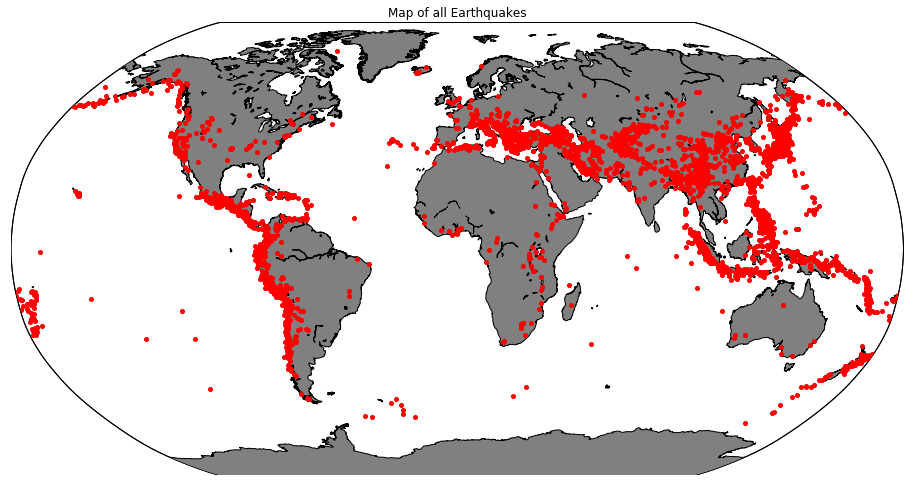

In [12]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
# set the size of the plot in width and height
rcParams['figure.figsize'] = (16,12)
# lon_0 is central longitude of projection.
# resolution = 'l' means use low resolution, which loads faster and works for a large map.
eq_map = Basemap(projection='robin', lon_0=0, lat_0=0, resolution='l', area_thresh=1500.0)
eq_map.drawcoastlines()
eq_map.fillcontinents(color='gray')
eq_map.drawmapboundary(fill_color='white')
x,y = eq_map(lon, lat)
# ro stands for red color and 'o' marker
eq_map.plot(x, y, 'ro', markersize=4)
plt.title("Map of all Earthquakes")
plt.show()

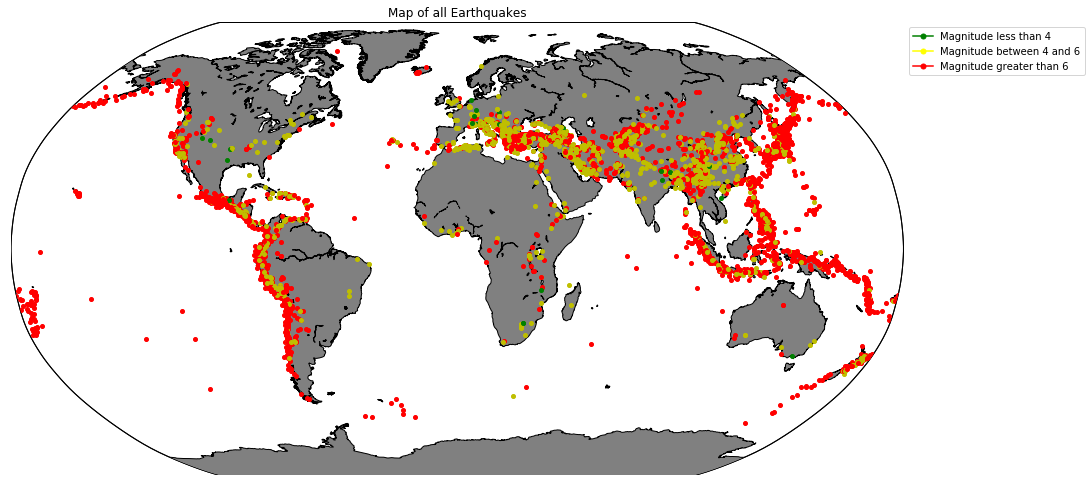

In [13]:
# for a slightly different perspective, lets visualize different colors based on the magnitude 
import matplotlib.lines as mlines
def color(magnitude):
    # Returns green for small earthquakes, yellow for medium earthquakes, and red for large earthquakes.
    if magnitude < 4.0:
        return ('go')
    elif magnitude < 6.0:
        return ('yo')
    else:
        return ('ro')
# specify the labels for the legend 
green_line = mlines.Line2D([], [], color='green', marker='o',
                          markersize=5, label='Magnitude less than 4')
yellow_line = mlines.Line2D([], [], color='yellow', marker='o',
                          markersize=5, label='Magnitude between 4 and 6')
red_line = mlines.Line2D([], [], color='red', marker='o',
                          markersize=5, label='Magnitude greater than 6')

rcParams['figure.figsize'] = (16,12)
# lon_0 is central longitude of projection.
# resolution = 'l' means use low resolution, which loads faster and works for a large map.
eq_map_col = Basemap(projection='robin', lon_0=0, lat_0=0, resolution='l', area_thresh=1500.0)
eq_map_col.drawcoastlines()
eq_map_col.fillcontinents(color='gray')
eq_map_col.drawmapboundary(fill_color='white')
# go through each value and plot with color according to the magnitude
for lo, la, ma in zip(lon, lat, mag):
    x,y = eq_map_col(lo, la)
    col = color(ma)
    eq_map_col.plot(x, y, col, markersize=4)

plt.title("Map of all Earthquakes")
plt.legend(handles=[green_line,yellow_line,red_line],bbox_to_anchor=(1, 1))
plt.show()

### Running algorithms on the Data

We start by trying to fit a linear regression model on the data, which will use a linear combination of the input variables that can best map to the target value . In this instance, I do not think this would be a great fit, as intuitively, it does not seem that there is a linear relationship between Year, latitude and longitude with the magnitude of an earthquake. 

In [16]:
# for running machine learning algorthms, lets concentrate on the features YEAR,LATITUDE and LONGITUDE with MAGNITUDE as the label
# creating a new dataset with these 3 columns
eqml_df = eq_df[['YEAR','LATITUDE','LONGITUDE','MAGNITUDE']]
X = eq_df[['YEAR','LATITUDE','LONGITUDE']]
y = eq_df['MAGNITUDE']

In [17]:
# splitting the data into test and train sets using sklearn modules
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(3210, 3) (1070, 3) (3210,) (1070, 3)


In [18]:
from sklearn.linear_model import LinearRegression
# initialize a linear regression model
regression_model = LinearRegression()
# fit the model using the training data above
regression_model.fit(X_train, y_train)
# after fitting, check the values predicted by the model on the test data
regression_model.predict(X_test)

array([ 6.35489618,  6.237847  ,  6.92514539, ...,  6.46554516,
        6.08877304,  6.38319125])

In [19]:
# prediction score for this model on the test data
regression_model.score(X_test,y_test)

0.080983384107284562

As sort of expected, the score is very low on the predicted values, which does not seem to map to the magnitude values from our target variable.

The next algorithm is a decision tree regressor, and the way this works is similar to a binary tree with a root and nodes on it. It proceeds down a sequential root answering 'If this then that' questions along the way, that ultimately leads to a result. It works well on both categorical and numerical data, and performance wise is also fast. Some of its downfalls include overfitting, especially if there are many features in the model and the tree runs deep.

In [23]:
from sklearn import tree
mod_tree = tree.DecisionTreeRegressor()
mod_tree.fit(X_train,y_train)
mod_tree.predict(X_test)

array([ 4.6,  6.5,  5.5, ...,  5.5,  7.8,  6.1])

In [24]:
# prediction score for this model on the test data
mod_tree.score(X_test,y_test)

0.053315860180034765

Surprisingly the score isnt great here either, on default settings, with max_depth as none and min_samples_split=2.

A random forest is an aggregation of multiple decision trees that combines all their results into one final result. This makes it a lot more robust than a single decision tree, and can help reduce errors due to bias and variance, that can creep into decision tree models. It randomly selects a subset of the features for each of its decision trees, which ultimately when combined, tends to cover all the features. Its also fairly resistant to overfitting. 

In [26]:
from sklearn.ensemble import RandomForestRegressor
# initialize the model
reg = RandomForestRegressor(random_state=28)
# fit the parameters
reg.fit(X_train, y_train)
reg.predict(X_test)

array([ 5.63,  6.  ,  5.44, ...,  5.53,  7.37,  6.74])

In [27]:
reg.score(X_test,y_test)

0.41936587298144423

This score is a significant improvement over the previous algorithms used, and we can try to further tune it by using cross validation to optimize the values of the hyperparameters.

In [29]:
from sklearn.model_selection import GridSearchCV
# initialize the parameters in multiples of 10
parameters = {'n_estimators':[1,10,100,500,1000]}
# initialize the gridsearch cross validation object
grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
# find the best fit from the parameters
best_fit = grid_fit.best_estimator_
best_fit.score(X_test,y_test)

0.45259898335142434

This model gives us a pretty decent score of around 45%, which we will use for our findings ahead

<h2 id="i4">V. Findings </h2> 

In the following section, we try to answer some of the research questions we had before the analysis began

### What would the approximate magnitude of an earthquake in the US in 2019 be?

In [123]:
# predicting using the best fit model, by passing the year as 2019, and the country latitudes and longitudes for the US.
x1 = [[2019,37.09,95.71]]
best_fit.predict(x1)

array([ 5.953])

So, we can expect an earthquake of magnitude around 5.95 in the US next year.

### In what year can we expect a large earthquake in the US (magnitude > 7.0)?

To answer this question, we would need to train the model using Year as the output while the magnitude, and country coordinates act as the features. 

In [124]:
# training the model with year as the output label
X = eq_df[['MAGNITUDE','LATITUDE','LONGITUDE']]
y = eq_df['YEAR']
# training and fitting the same model as previously
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)
reg = RandomForestRegressor(random_state=30)
reg.fit(X_train, y_train)
grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.score(X_test,y_test)
# the score is a lot less than with Magnitude as the label

0.31003254195117225

In [126]:
x2 = [[7.0,37.09,95.71]]
best_fit.predict(x2)

array([ 1815.7085])

The problem with this prediction, is that the Year column is being fed in as integer instead of datetime. Trying to convert this column to datetime, gives an error since python does not seem to work well with negative dates(BC).

### Which country has historically had most number of earthquakes?

In [138]:
eq_df.groupby('COUNTRY').size().sort_values(ascending=False)

COUNTRY
CHINA                                   559
JAPAN                                   340
INDONESIA                               300
IRAN                                    244
USA                                     208
TURKEY                                  199
GREECE                                  147
PERU                                    143
CHILE                                   141
RUSSIA                                  138
PHILIPPINES                             122
MEXICO                                  115
ITALY                                    95
TAIWAN                                   91
PAPUA NEW GUINEA                         85
INDIA                                    77
NEW ZEALAND                              60
SOLOMON ISLANDS                          58
COLOMBIA                                 53
AFGHANISTAN                              52
ECUADOR                                  52
VANUATU                                  46
PAKISTAN                

Grouping the dataset by Country, looking at the count and ordering by a descending number of the count, gives us the list above. 

China leads the pack with 559 occurences in the list, which was slightly surprising, but I suspect it has something to do with how the territories were divided between China and Japan historically. 

<h2 id="i5">VI. Conclusion </h2> 

Overall, I think this was a learning experience for me personally, where I could experiment with different machine learning algorithms and see how well they scaled with historical earthquake data. <br>
What makes predicting earthquakes so challenging, in spite of having detailed historical data, is that it doesn't seem to follow any particular pattern precisely. Fault lines around the world do tend to slip in a somewhat cyclical pattern, but any predictions made using this, is likely to be a window of +-20 years at best, rather than a precise time. <br> This case is best highlighted when in 1981, scientists made a prediction saying the California fault line could trigger an earthquake in the next few months, and in order to monitor the forces before and after the event, huge stations and monitoring equipment was set up all over the place, with a significant investment. It turned out that the earthquake actually occured in 2001, 20 years after they were expecting it. <br>
However, machine learning does open up a new perspective to tackle this challenge, and I believe that if we can finetune our algorithms to achieve a high degree of accuracy with the data, it can definitely lead to more accurate predictions, that might not pinpoint the occurrence down to the exact second, but can help reduce the uncertainty window down significantly. That would be a huge step forward. <br>
From a human design perspective, the solution must present end users, with enough time to act upon their warnings. There is a system currently in Japan, that can sound an alarm before an earthquake is about to occur. This is apparently the time it takes for the waves to travel from the epicenter to the location of the alarm, which is usually less than 30 seconds. While better than nothing, the window is still too small for people to really act on it, and just provides enough time to duck underneath a sturdy table perhaps. <br>
The most promising research in my opinion, comes from trying to mimic the actual forces at play under the ground, in a lab setting, to produce acoustic signals that can then be used to train a machine learning algorithm. The signals produced just before the fault line releases that energy, has a particular sound signature to it, that can be used to identify and predict future occurrences. This method was highlighted in one of the papers referenced above, in the background section. <br>
[Machine learning predicts earthquakes in a lab](https://www.cam.ac.uk/research/news/machine-learning-used-to-predict-earthquakes-in-a-lab-setting) <br>
There is a lot of exciting ongoing research on this topic, and I do hope one of these days we manage to make a breakthrough, and end one of the long standing mysteries of our planet.

<h2 id="i7">VII. References </h2> 

[Machine learning predicts earthquakes in a lab](https://www.cam.ac.uk/research/news/machine-learning-used-to-predict-earthquakes-in-a-lab-setting) <br>
[Hindukush earthquake magnitude prediction](https://www.researchgate.net/publication/307951466_Earthquake_magnitude_prediction_in_Hindukush_region_using_machine_learning_techniques) <br>
[Analysis of soil radon data using decision trees](https://www.sciencedirect.com/science/article/pii/S0969804303000940)<br>
[Using Neural Networks to predict earthquake magnitude](https://www.sciencedirect.com/science/article/pii/S0893608009000926)<br>
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6033417/ <br>
https://earthquake.usgs.gov/data/data.php#eq <br>
https://arxiv.org/pdf/1702.05774.pdf <br>
https://www.scientificamerican.com/article/can-artificial-intelligence-predict-earthquakes/